In [0]:
DRIVE = True

In [0]:
# allows the notebook to reload a file (.py for example) when it changes
%load_ext autoreload
%autoreload 2

# allows the notebook to display matplotlib plots
%matplotlib inline

# allows the notebook to display the execution time of each cell
! pip install ipython-autotime
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=3e825b3cca19f25b3158807bca183a9967b4c26b496fb5bfbd5d8c7d16156cf7
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [0]:
if DRIVE:
    # mounting Drive, changing current directory and changing tensorflow version
    # tensorflow_version only exists on Colab
    import os
    from google.colab import drive
    drive.mount("drive")
    os.chdir("drive/My Drive/univ/master-2/SAM/7-projet")

    try:
        %tensorflow_version 2.x
    except Exception:
        print("Cannot import tensorflow 2.x. You must fix it.")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive
TensorFlow 2.x selected.
time: 21.9 s


In [0]:
# ----- EXTRA MODULES -----
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier
)
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC

# tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten

# ----- OWN MODULES -----
from scripts.msdi_io import *
from scripts.msdi_sound import *

time: 4.78 ms


# Loading data

1. dataframe
2. mfcc
3. deep features



In [0]:
MSDI_PATH = "data"
SUBSETS = ["train", "test", "val"]

MSDI_DF = get_msdi_dataframe(MSDI_PATH)
MSDI_DF.describe()

,id,album_index,deep_features
count,30712.000000,30712.000000,30712.000000
mean,15356.086611,8312.457932,8152.105887
std,8866.355100,6061.248551,6470.243070
min,0.000000,0.000000,0.000000
25%,7677.750000,3225.750000,2559.000000
50%,15356.500000,7027.000000,6026.500000
75%,23034.250000,12692.000000,13705.250000
max,30712.000000,22375.000000,21383.000000


time: 118 ms


In [0]:
X_MFCC_RAW, X_DEEP_FEATURES, Y_RAW = get_mfcc_deep_features_and_labels(MSDI_DF,
                                                                       MSDI_PATH,
                                                                       n_samples=None)

# ----- LABELS -----
LABELS = get_label_list()
label_encoder = LabelEncoder().fit(LABELS)
Y = {subset: label_encoder.transform(Y_RAW[subset]) for subset in SUBSETS}

# ----- NORMALIZING MFCC -----
#TODO

for subset in SUBSETS:
    print(f"{subset} MFCC shape : {X_MFCC_RAW[subset].shape}")
    print(f"{subset} DEEP_FEATURES shape : {X_DEEP_FEATURES[subset].shape}")
    print(f"{subset} Y shape : {Y[subset].shape}")

    print(f"{subset} MFCC[0] shape : {X_MFCC_RAW[subset][0].shape}")
    print(f"{subset} MFCC[1] shape : {X_MFCC_RAW[subset][1].shape}")
    print(f"{subset} MFCC[2] shape : {X_MFCC_RAW[subset][2].shape}")
    
    print(f"{subset} DEEP_FEATURES[0] shape : {X_DEEP_FEATURES[subset][0].shape}")
    print(f"{subset} DEEP_FEATURES[1] shape : {X_DEEP_FEATURES[subset][1].shape}")
    print(f"{subset} DEEP_FEATURES[2] shape : {X_DEEP_FEATURES[subset][2].shape}")

    print()

Key errors : 1
train MFCC shape : (21382,)
train DEEP_FEATURES shape : (21382, 2048)
train Y shape : (21382,)
train MFCC[0] shape : (820, 12)
train MFCC[1] shape : (194, 12)
train MFCC[2] shape : (797, 12)
train DEEP_FEATURES[0] shape : (2048,)
train DEEP_FEATURES[1] shape : (2048,)
train DEEP_FEATURES[2] shape : (2048,)

test MFCC shape : (4649,)
test DEEP_FEATURES shape : (4649, 2048)
test Y shape : (4649,)
test MFCC[0] shape : (1120, 12)
test MFCC[1] shape : (900, 12)
test MFCC[2] shape : (925, 12)
test DEEP_FEATURES[0] shape : (2048,)
test DEEP_FEATURES[1] shape : (2048,)
test DEEP_FEATURES[2] shape : (2048,)

val MFCC shape : (4680,)
val DEEP_FEATURES shape : (4680, 2048)
val Y shape : (4680,)
val MFCC[0] shape : (972, 12)
val MFCC[1] shape : (1021, 12)
val MFCC[2] shape : (730, 12)
val DEEP_FEATURES[0] shape : (2048,)
val DEEP_FEATURES[1] shape : (2048,)
val DEEP_FEATURES[2] shape : (2048,)

time: 6min 30s


shape (1508, 12)


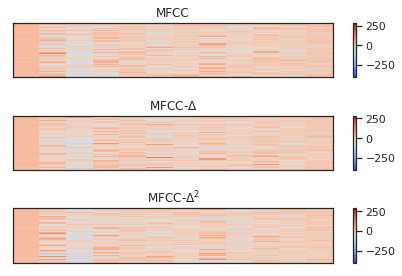

time: 553 ms


In [0]:
sound = X_MFCC_RAW["test"][32]
print('shape', sound.shape)
display_mfcc_delta_delta2(sound, sound, sound)

## Is there a difference in the length of our splitting ?

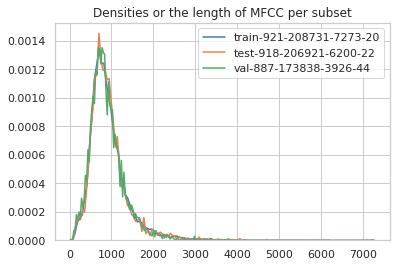

time: 281 ms


In [0]:
def plot_len_density_of_mfcc(data):
    sns.set_style('whitegrid')

    size_of_mfcc = {key: list(map(lambda x: x.shape[0], data[key])) for key in data.keys()}
    
    mean_of_mfcc = {subset: int(np.array(size_of_mfcc[subset]).mean()) for subset in data.keys()}
    var_of_mfcc  = {subset: int(np.array(size_of_mfcc[subset]).var()) for subset in data.keys()}
    max_of_mfcc  = {subset: int(np.array(size_of_mfcc[subset]).max()) for subset in data.keys()}
    min_of_mfcc  = {subset: int(np.array(size_of_mfcc[subset]).min()) for subset in data.keys()}

    for subset in data.keys():
        label = f"{subset}-{mean_of_mfcc[subset]}-{var_of_mfcc[subset]}-{max_of_mfcc[subset]}-{min_of_mfcc[subset]}"
        sns.kdeplot(size_of_mfcc[subset], bw=0.5, label=label)

    plt.title("Densities or the length of MFCC per subset")

plot_len_density_of_mfcc(X_MFCC_RAW)

# Classifieur audio 1 : MFCC aggrégé + régression logistique

Trois méthodes d'extraction différentes :

1. (min, max, mean, var) mfcc
2. histogram mfcc
3. resampled mfcc
4. crop (NOT YET)
5. gaussian mixtures (NOT YET)

In [0]:
# ----- get the max number of trames -----
def get_max_number_of_frames(data):
    mfcc_len_max = 0
    for subset in data.keys():
        local_max = np.array(sorted(data[subset], key=len))[-1].shape[0]
        mfcc_len_max = max(local_max, mfcc_len_max)
    return mfcc_len_max

# ----- get the mean number of trames -----
def get_mean_number_of_frames(data):
    mfcc_len_mean = 0
    for subset in data.keys():
        for x in range(data[subset].shape[0]):
            mfcc_len_mean += len(data[subset][x])

        mfcc_len_mean /= data[subset].shape[0]
    return int(mfcc_len_mean)

# ----- display results -----
mfcc_len_mean = get_mean_number_of_frames(X_MFCC_RAW)
mfcc_len_max = get_max_number_of_frames(X_MFCC_RAW)
print("mean number of trames in mfcc :", mfcc_len_mean)
print("max number of trames in mfcc :", mfcc_len_max)

mean number of trames in mfcc : 888
max number of trames in mfcc : 7273
time: 27.4 ms


In [0]:
# (min, max, mean, var)
def aggregate_mfcc_1(mfcc):
    return np.array([
        get_min_mfcc(mfcc),
        get_max_mfcc(mfcc),
        get_mean_mfcc(mfcc),
        get_var_mfcc(mfcc)
    ]).flatten()

# histogram
_n_bins = 100
def aggregate_mfcc_2(mfcc, n_bins=_n_bins):
    return np.array([
        get_histogram_mfcc(mfcc, n_bins)
    ]).flatten()

# resampled
def aggregate_mfcc_3(mfcc, target_size=mfcc_len_mean):
    return np.array([
        get_resample_mfcc(mfcc, target_size)
    ]).flatten()

time: 3.74 ms


In [0]:
# ----- CLASSIFIERS -----
classifier_names = [
    "LogisticRegression",
    # "GradientBoostingClassifier",
    "Linear SVM"
]
classifier_funcs = [
    LogisticRegression,
    # GradientBoostingClassifier,
    SVC
]

# ----- FEATURES -----
feature_names = ["(min, max, mean, var)", f"(histogram with {_n_bins} bins)"] #, "resampled"]
feature_funcs = [aggregate_mfcc_1, aggregate_mfcc_2] #, aggregate_mfcc_3]

# -----
# fixme
results = {feature_name: {} for feature_name in feature_names}
# -----

for feature_name, feature_func in zip(feature_names, feature_funcs):
    X = {subset: [feature_func(x) for x in X_MFCC_RAW[subset]] for subset in SUBSETS}

    print(f"{feature_name}")
    
    # ----- TRAIN -----
    for classifier_name, classifier_func in zip(classifier_names, classifier_funcs):
        print(f"\t{classifier_name}")
        
        results[feature_name][classifier_name] = {}

        clf = classifier_func(verbose=False)
        clf.fit(X["train"], Y["train"])

        # ----- SCORES -----
        for subset in SUBSETS:
            results[feature_name][classifier_name][subset] = clf.score(X[subset], Y[subset])
            
            print(f"\t\t{subset}")

(min, max, mean, var)
	LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


		train
		test
		val
	Linear SVM
		train
		test
		val
(histogram with 100 bins)
	LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


		train
		test
		val
	Linear SVM
		train
		test
		val
time: 5min 52s


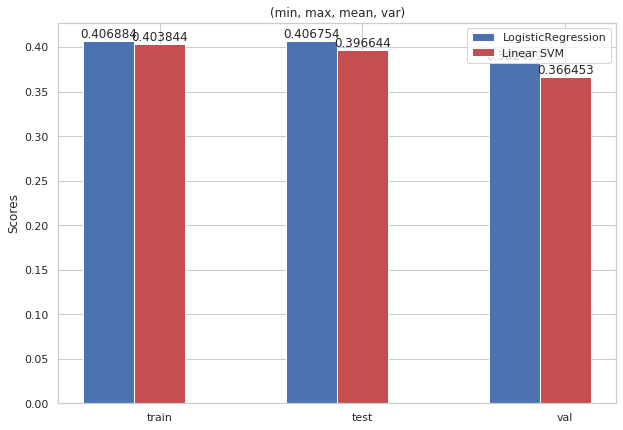

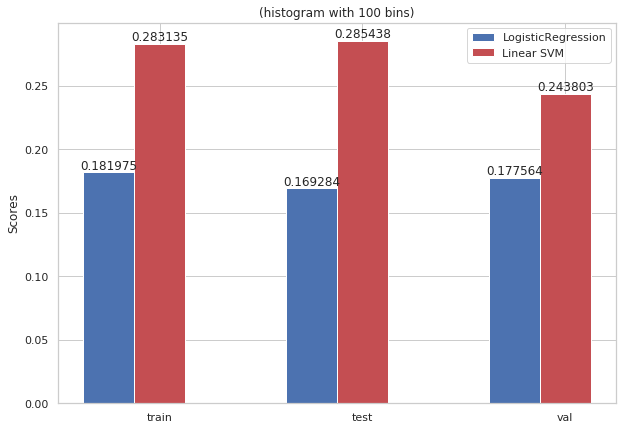

time: 453 ms


In [0]:
def autolabel(rects, ax):
    """ Attach a text label above each bar displaying its height.
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%f' % float(height),
                ha='center', va='bottom')

def plot_results():
    for feature_name in feature_names:
        """
        for classifier_name in classifier_names:
            names = list(results[feature_name][classifier_name].keys())
            values = list(results[feature_name][classifier_name].values())
        """

        fig, ax = plt.subplots()
        ind = np.arange(len(classifier_names) + 1)
        width = 0.25
        colors = ["b", "r"]
        distances = [0, 0.25]

        for idx_clf, classifier_name in enumerate(classifier_names): 
            values = list(results[feature_name][classifier_name].values())

            rects = ax.bar(
                ind + distances[idx_clf],
                values,
                color=colors[idx_clf],
                width=width,
                label=classifier_name
            )

            autolabel(rects, ax)

        ax.set_ylabel("Scores")
        ax.set_title(feature_name)
        ax.set_xticks(ind + width)
        ax.set_xticklabels(SUBSETS)
        ax.legend()
        fig.set_size_inches(10, 7)
        plt.show()

plot_results()

## gaussian mixtures (NOT YET)

In [0]:
# ----- Gaussian Mixtures -----
def fit_gmm(mfccs, n_components=256):
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(mfccs)
    return gmm

def predict(gmm, mfccs):
    return gmm.score(mfccs)

gmm = fit_gmm(X['train'])
print(predict(gmm, X['test']))
print(predict(gmm, X['val']))

# Classifieur audio 2 : MFCC aggrégé + CNN

## Reshape MFCC so they have a fixed size in order to pass them into CNN

In [0]:
def crop_mfcc(data, labels, size):
    result_X = {subset: [] for subset in SUBSETS}
    result_Y = {subset: [] for subset in SUBSETS}

    for subset in SUBSETS:
        X = data[subset]
        Y = labels[subset]

        for x, y in zip(X, Y):
            if x.shape[0] >= size:
                result_X[subset].append(x[:size])
                result_Y[subset].append(y)
        
        result_X[subset] = np.array(result_X[subset])
        result_Y[subset] = np.array(result_Y[subset])
    
    return result_X, result_Y

CROP_SIZE = 500
X_MFCC_CROP, Y_CROP = crop_mfcc(X_MFCC_RAW, Y, CROP_SIZE)
for subset in SUBSETS:
    X_MFCC_CROP[subset] = tf.expand_dims(X_MFCC_CROP[subset], -1)

Y_CROP_BINARY = {subset: tf.keras.utils.to_categorical(Y_CROP[subset]) for subset in SUBSETS}

time: 1.05 s


## Define network

In [0]:
def NOT_WORKING_custom_net(input_size=(CROP_SIZE, 12, 1), num_classes=15):
    """ NOT WORKING.
    """
    model = Sequential()
    model.add(Input(input_size))

    # block 1
    model.add(Conv2D(filters=32, kernel_size=(4, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(4, 2)))
    
    # block 2
    model.add(Conv2D(filters=64, kernel_size=(4, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(4, 1)))

    # block 3
    model.add(Conv2D(filters=64, kernel_size=(4, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(4, 1)))

    # block 4
    model.add(Conv2D(filters=32, kernel_size=(1, 1), activation='relu'))
    model.add(MaxPool2D(pool_size=(4, 3)))

    # output block
    model.add(Dense(num_classes, activation='sigmoid'))
    #model.add(Dense(num_classes, activation='softmax'))


    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
    return model


def sound_create_nn_1(input_size, num_classes, optimizer, metrics, weights_path=None):
    model = Sequential()
    model.add(Input(input_size))

    # block 1
    model.add(Conv2D(filters=32, kernel_size=(4, 3), activation='relu',
                     input_shape=input_size))
    model.add(MaxPool2D(pool_size=(4, 2)))

    # block 2
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    # output block
    #model.add(Dense(num_classes, activation='sigmoid'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=metrics)
    
    # load weights if arg is passed
    if weights_path:
        model.load_weights(weights_path)
    return model

time: 29.3 ms


In [0]:
opt = tf.optimizers.Adam(lr=10e-4, beta_1=0.9, beta_2=0.999, amsgrad=False)
metrics = [tf.metrics.AUC()]

cnn = custom_net(input_size=(CROP_SIZE, 12, 1),
                 num_classes=len(LABELS),
                 optimizer=opt,
                 metrics=metrics)
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 497, 10, 32)       416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 124, 5, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 19840)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               2539648   
_________________________________________________________________
dense_13 (Dense)             (None, 15)                1935      
Total params: 2,541,999
Trainable params: 2,541,999
Non-trainable params: 0
_________________________________________________________________
time: 121 ms


In [0]:
# Create a callback that saves the model's weights
checkpoint_path = "./data/models/SoundNet.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# create a call that stops the training when we're not learning anymore
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

time: 2.93 ms


In [0]:
cnn.fit(X_MFCC_CROP["train"],
        Y_CROP_BINARY["train"],
        batch_size=32,
        epochs=100,
        verbose=1,
        validation_data=(X_MFCC_CROP["val"], Y_CROP_BINARY["val"]),
        callbacks=[cp_callback, es_callback])

Train on 19031 samples, validate on 4075 samples
Epoch 1/100
19008/19031 [============================>.] - ETA: 0s - loss: 3.5968 - auc_4: 0.5635
Epoch 00001: saving model to ./data/models/SoundNet.ckpt
19031/19031 [==============================] - 6s 307us/sample - loss: 3.5962 - auc_4: 0.5636 - val_loss: 3.5187 - val_auc_4: 0.5665
Epoch 2/100
19008/19031 [============================>.] - ETA: 0s - loss: 3.5887 - auc_4: 0.5638
Epoch 00002: saving model to ./data/models/SoundNet.ckpt
19031/19031 [==============================] - 6s 290us/sample - loss: 3.5874 - auc_4: 0.5638 - val_loss: 3.5187 - val_auc_4: 0.5665
Epoch 3/100
18880/19031 [============================>.] - ETA: 0s - loss: 3.5890 - auc_4: 0.5638
Epoch 00003: saving model to ./data/models/SoundNet.ckpt
19031/19031 [==============================] - 5s 277us/sample - loss: 3.5874 - auc_4: 0.5638 - val_loss: 3.5187 - val_auc_4: 0.5665
Epoch 4/100
18848/19031 [============================>.] - ETA: 0s - loss: 3.5887 - auc

time: 59.9 s


In [0]:
[print(len(X_MFCC_CROP[subset])) for subset in SUBSETS]

#print("TEST - loss, accuracy", cnn.evaluate(X_MFCC_CROP["test"], Y_CROP_BINARY["test"], verbose=0))
#print("VAL - loss, accuracy", cnn.evaluate(X_MFCC_CROP["val"], Y_CROP_BINARY["val"], verbose=0))
#print("TRAIN - loss, accuracy", cnn.evaluate(X_MFCC_CROP["train"], Y_CROP_BINARY["train"], verbose=0))

preds = cnn.predict(X_MFCC_CROP["test"])
trues = Y_CROP_BINARY["test"]

print(Y_CROP_BINARY["test"][25:30])
print(preds[25:50])

"""
confusion_matrix = tf.math.confusion_matrix(
    trues,
    preds,
    num_classes=len(LABELS)
)

print(confusion_matrix)

df_cm = pd.DataFrame(array, range(6), range(6))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()
"""

19031
4146
4075
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 

'\nconfusion_matrix = tf.math.confusion_matrix(\n    trues,\n    preds,\n    num_classes=len(LABELS)\n)\n\nprint(confusion_matrix)\n\ndf_cm = pd.DataFrame(array, range(6), range(6))\n# plt.figure(figsize=(10,7))\nsn.set(font_scale=1.4) # for label size\nsn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size\n\nplt.show()\n'

time: 440 ms


# Classifieur audio 3 : Deep features + sigmoïde

In [0]:
def sound_create_nn_2(input_size, num_classes, optimizer, metrics, weights_path=None):
    model = Sequential()
    model.add(Input(input_size))

    # output block
    model.add(Dense(num_classes, activation='sigmoid'))

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=metrics)

    # load weights if arg is passed
    if weights_path:
        model.load_weights(weights_path)

    return model

time: 4.35 ms


In [0]:
input_shape = X_DEEP_FEATURES["train"][0].shape
opt = tf.optimizers.Adam(lr=10e-4, beta_1=0.9, beta_2=0.999, amsgrad=False)
metrics = [tf.metrics.AUC()]

dense_net = sound_create_nn_2(input_shape, len(LABELS), opt, metrics)
dense_net.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 15)                30735     
Total params: 30,735
Trainable params: 30,735
Non-trainable params: 0
_________________________________________________________________
time: 99.4 ms


In [0]:
# Create a callback that saves the model's weights
checkpoint_path = "./data/models/SoundNet2.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# create a call that stops the training when we're not learning anymore
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# to categorical labels
Y_CATEGORICAL = {subset: tf.keras.utils.to_categorical(Y[subset]) for subset in SUBSETS}

dense_net.fit(X_DEEP_FEATURES["train"],
            Y_CATEGORICAL["train"],
            batch_size=32,
            epochs=100,
            verbose=1,
            validation_data=(X_DEEP_FEATURES["val"], Y_CATEGORICAL["val"]),
            callbacks=[cp_callback, es_callback])

Train on 21382 samples, validate on 4680 samples
Epoch 1/100
21088/21382 [============================>.] - ETA: 0s - loss: 1.6478 - auc_6: 0.8666
Epoch 00001: saving model to ./data/models/SoundNet2.ckpt
21382/21382 [==============================] - 4s 174us/sample - loss: 1.6451 - auc_6: 0.8668 - val_loss: 1.6661 - val_auc_6: 0.8724
Epoch 2/100
21184/21382 [============================>.] - ETA: 0s - loss: 1.4449 - auc_6: 0.8995
Epoch 00002: saving model to ./data/models/SoundNet2.ckpt
21382/21382 [==============================] - 3s 127us/sample - loss: 1.4456 - auc_6: 0.8994 - val_loss: 1.6685 - val_auc_6: 0.8694
Epoch 3/100
21088/21382 [============================>.] - ETA: 0s - loss: 1.4184 - auc_6: 0.8985
Epoch 00003: saving model to ./data/models/SoundNet2.ckpt
21382/21382 [==============================] - 3s 133us/sample - loss: 1.4178 - auc_6: 0.8986 - val_loss: 1.6540 - val_auc_6: 0.8677
Epoch 4/100
21152/21382 [============================>.] - ETA: 0s - loss: 1.3994 - 

time: 43.9 s


21382
4649
4680


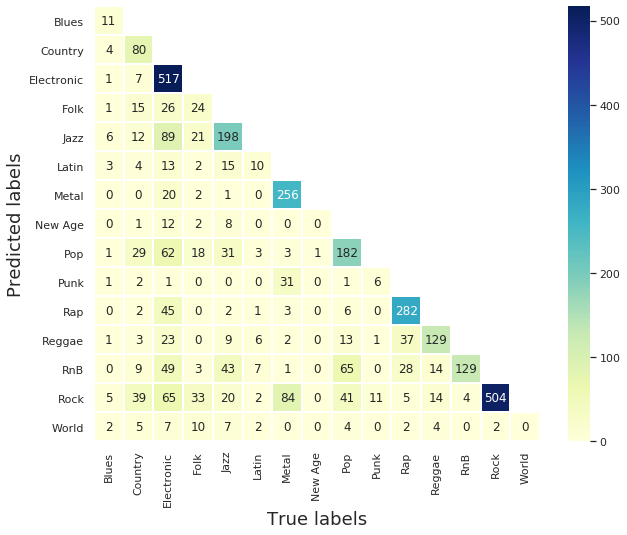

time: 940 ms


In [0]:
[print(len(X_DEEP_FEATURES[subset])) for subset in SUBSETS]

#print("TEST - loss, accuracy", cnn.evaluate(X_MFCC_CROP["test"], Y_CROP_BINARY["test"], verbose=0))
#print("VAL - loss, accuracy", cnn.evaluate(X_MFCC_CROP["val"], Y_CROP_BINARY["val"], verbose=0))
#print("TRAIN - loss, accuracy", cnn.evaluate(X_MFCC_CROP["train"], Y_CROP_BINARY["train"], verbose=0))

preds = np.argmax(dense_net.predict(X_DEEP_FEATURES["test"]), axis=1)
trues = np.argmax(Y_CATEGORICAL["test"], axis=1)

cm = np.array(tf.math.confusion_matrix(
    trues,
    preds,
    num_classes=len(LABELS)
))


import pandas as pd
import seaborn as sns

def display_confusion_matrix(true_values, pred_values, labels):
    """
    to improve with totals
    https://stackoverflow.com/questions/33379261/how-can-i-have-a-bar-next-to-python-seaborn-heatmap-which-shows-the-summation-of
    """
    # calculate the confusion matrix with tensorflow function
    confusion_matrix = tf.math.confusion_matrix(
        true_values, pred_values, num_classes=len(labels)
    )
    confusion_matrix = np.array(confusion_matrix)

    # transform the confusion matrix to pandas dataframe to ease usage
    confusion_matrix = pd.DataFrame(
        confusion_matrix,
        index=[label for label in labels],
        columns=[label for label in labels]
    )
    
    # calculate a mask to display only the bottom triangle with diagonal
    mask = np.ones_like(confusion_matrix)
    mask[np.tril_indices_from(mask)] = False
    
    # display it !
    fig = plt.figure(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        mask=mask,
        annot=True,
        fmt="d",
        linewidths=1,
        linecolor="white",
        cmap="YlGnBu"
    )
    plt.xlabel("True labels", fontsize=18)
    plt.ylabel("Predicted labels", fontsize=18)
    plt.show()

    # histogram of accuracy per class
    # TODO

display_confusion_matrix(trues, preds, LABELS)